# Problem description: 

The problem that I will solve is a time series problem. I will feed sequences from anoisy sine function into the Recurrent Neural Network (RNN) model to recover the actual sine function.

> Dataset: 1500 times steps for training and 500 for testing

#### 1) Import the necessary packages


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [ ]:
np.random.seed(0) #To make sure that any random value generated is reproducible.

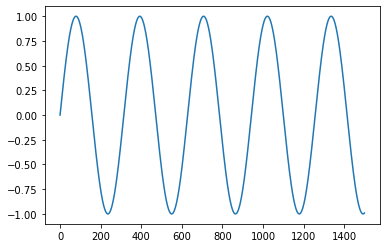

In [ ]:
# Before Adding the noise 
t = np.arange(0,1500)
x_without_noise = np.sin(0.02*t) 
plt.plot(x_without_noise)

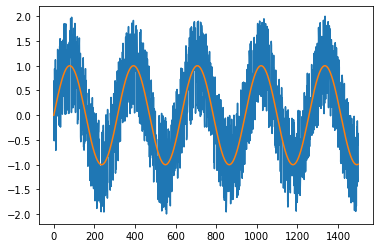

In [ ]:
# After adding the noise
t = np.arange(0,1500)
x = np.sin(0.02*t) + np.random.uniform(low=-1, high=1, size = (1500,))
plt.plot(x)
plt.plot(x_without_noise)

#### 2) Create the dataset:

In [ ]:
#### Normalize the dataset
normalizer = MinMaxScaler(feature_range=(0, 1))
x = (np.reshape(x, (-1, 1)))
x = normalizer.fit_transform(x)
print(x)


[[0.47268718]
 [0.67307756]
 [0.37005021]
 ...
 [0.16176822]
 [0.40761572]
 [0.35008223]]


In [ ]:
# Create the dataset

train = x[0:1000]
test = x[1000:]
print(train.shape)

(1000, 1)


In [ ]:
def createDataset(data, step):
    X, Y =[], []
    for i in range(len(data)-step): 
        X.append(data[i:i+step])
        Y.append(data[i+step])
    return np.array(X), np.array(Y)
 
step = 10
X_train,y_train = createDataset(train,step)
X_test, y_test = createDataset(test,step)
print(trainX[0])

[[0.47268718]
 [0.67307756]
 [0.37005021]
 [0.51131047]
 [0.73446025]
 [0.6080536 ]
 [0.67855826]
 [0.5598003 ]
 [0.7798011 ]
 [0.58854793]]


In [ ]:
print(X_train.shape)

(990, 10, 1)


#### 3) Create and compile our model

In [ ]:
model = Sequential()
model.add(SimpleRNN(units= 1, activation='tanh'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='rmsprop')

In [ ]:
history = model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=2)

Epoch 1/200
62/62 - 1s - loss: 0.1631 - 1s/epoch - 21ms/step
Epoch 2/200
62/62 - 0s - loss: 0.0983 - 128ms/epoch - 2ms/step
Epoch 3/200
62/62 - 0s - loss: 0.0707 - 142ms/epoch - 2ms/step
Epoch 4/200
62/62 - 0s - loss: 0.0596 - 147ms/epoch - 2ms/step
Epoch 5/200
62/62 - 0s - loss: 0.0536 - 136ms/epoch - 2ms/step
Epoch 6/200
62/62 - 0s - loss: 0.0502 - 145ms/epoch - 2ms/step
Epoch 7/200
62/62 - 0s - loss: 0.0476 - 131ms/epoch - 2ms/step
Epoch 8/200
62/62 - 0s - loss: 0.0457 - 141ms/epoch - 2ms/step
Epoch 9/200
62/62 - 0s - loss: 0.0444 - 132ms/epoch - 2ms/step
Epoch 10/200
62/62 - 0s - loss: 0.0432 - 136ms/epoch - 2ms/step
Epoch 11/200
62/62 - 0s - loss: 0.0423 - 136ms/epoch - 2ms/step
Epoch 12/200
62/62 - 0s - loss: 0.0416 - 134ms/epoch - 2ms/step
Epoch 13/200
62/62 - 0s - loss: 0.0410 - 140ms/epoch - 2ms/step
Epoch 14/200
62/62 - 0s - loss: 0.0404 - 133ms/epoch - 2ms/step
Epoch 15/200
62/62 - 0s - loss: 0.0400 - 138ms/epoch - 2ms/step
Epoch 16/200
62/62 - 0s - loss: 0.0395 - 132ms/epoc

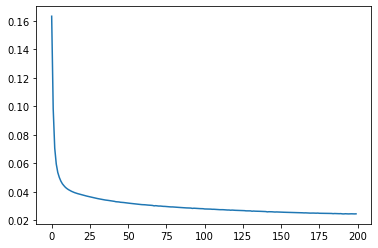

In [ ]:
loss = history.history['loss']
 
plt.plot(loss)

#### 4) Predictions


In [ ]:
train_Predict = normalizer.inverse_transform(model.predict(X_train))
test_Predict= normalizer.inverse_transform(model.predict(X_test))
predicted= np.concatenate((train_Predict,test_Predict))
x = normalizer.inverse_transform(x)

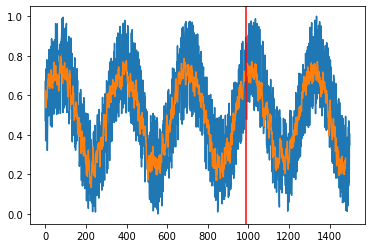

In [ ]:
plt.plot(x)
plt.plot(predicted)
plt.axvline(len(X_train), c="r")